# 1. Imprort data & packages

In [1]:
%run C:/Users/HSS/dd.py
print('done')

done


In [2]:
churn = pd.read_csv('C:/Users/HSS/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [43]:
pd.set_option('display.max_columns', None)
data = churn.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

## Data Description 
- `customerID`: Customer ID 고객 ID
- `gender`: Whether the customer is a male or a female 고객 성별
- `SeniorCitizen`: Whether the customer is a senior citizen or not (1, 0) 65세 이상(경로)
- `Partner`: Whether the customer has a partner or not (Yes, No) 배우자 여부
- `Dependents`: Whether the customer has dependents or not (Yes, No) 자녀 여부
- `tenure`: Number of months the customer has stayed with the company 계약 기간
- `PhoneService`: Whether the customer has a phone service or not (Yes, No) 핸드폰 서비스 사용 여부
- `MultipleLines`: Whether the customer has multiple lines or not (Yes, No, No phone service)
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No) 인터넷 서비스 종류 (DSL, Fiber, optic, No)
- `OnlineSecurity`: Whether the customer has online security or not (Yes, No, No internet service) (온라인보안서비스가입여부)
- `OnlineBackup`: Whether the customer has online backup or not (Yes, No, No internet service) (온라인백업서비스가입여부)
- `DeviceProtection`: Whether the customer has device protection or not (Yes, No, No internet service) (기기보호)
- `TechSupport`: Whether the customer has tech support or not (Yes, No, No internet service)
- `StreamingTV`: Whether the customer has streaming TV or not (Yes, No, No internet service)
- `StreamingMovie`: Whether the customer has streaming movies or not (Yes, No, No internet service)
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year)
- `PaperlessBilling`: Whether the customer has paperless billing or not (Yes, No)
- `PaymentMethod`: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer
- `ChurnWhether`: the customer churned or not (Yes or No)

## 대략적인 데이터 경향

- `Churn` 과 `tenure`가 가장 밀접한 선형 관계를 갖고 있다.
- `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies` 가 같은 방향으로 움직인다. 

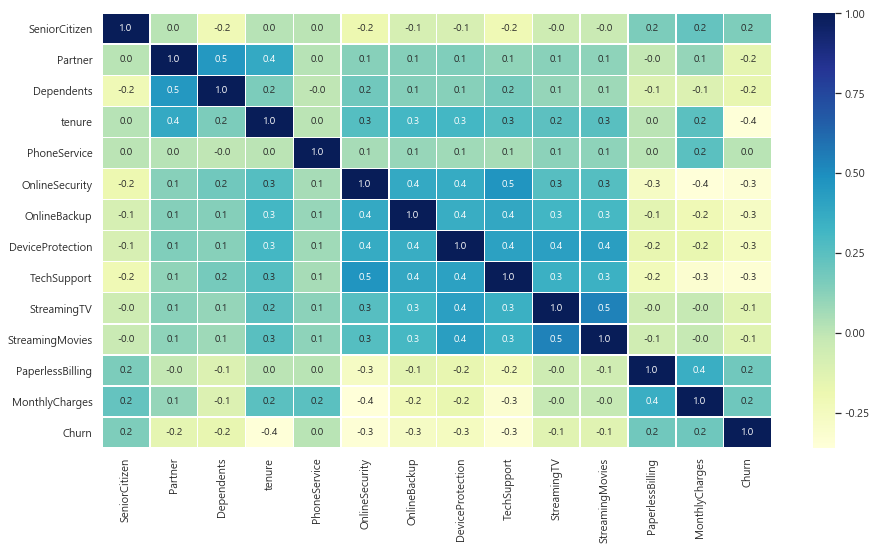

In [42]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
plt.show()

## 같은 성격의 보장류 서비스, 스트리밍 서비스 등의 처리 방법
- 선택1 : 병합해 하나의 칼럼으로 만든다.
- 선택2 : 그대로 둔다.

## 훈련 데이터, 테스트 데이터 분리

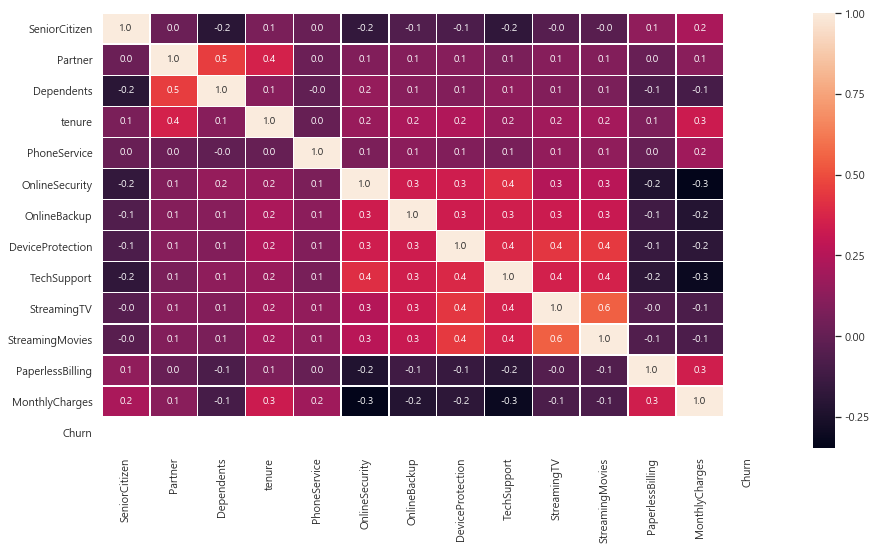

In [34]:
plt.figure(figsize = (15,8))
sns.heatmap(customers.corr(), annot=True, linewidths=.5, fmt= '.1f')
plt.show()

### - 데이터 전처리
- Partener, Dependents 등 Yes or No로 되어 있는 데이터를 1과 0으로 변경
- Churn과 Customer 세트 분리하기


In [5]:
# Yes, NO ONE HOT 
data = churn.copy()
columns = data.columns.values
y_n_columns = columns[[3,4,6,9,10,11,12,13,14,16,20]]
y_n_columns

array(['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn'], dtype=object)

In [6]:
for i in y_n_columns:
    data[i] = data[i].apply(lambda x: 0 if x == 'No' else 1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [85]:
# tenure
print('평균 계약 기간은 {}개월이고, 75%의 사람들은 {}개월 이하 동안 해당 통신사를 사용했습니다. 최장수 고객은 무려 {}개월이나 계약을 유지했습니다. '
     .format(int(data['tenure'].mean()), int(data['tenure'].quantile(0.75)), data['tenure'].max()))

평균 계약 기간은 32개월이고, 75%의 사람들은 55개월 이하 동안 해당 통신사를 사용했습니다. 최장수 고객은 무려 72개월이나 계약을 유지했습니다. 


In [86]:
bins = np.arange(1,72,10);bins

array([ 1, 11, 21, 31, 41, 51, 61, 71])

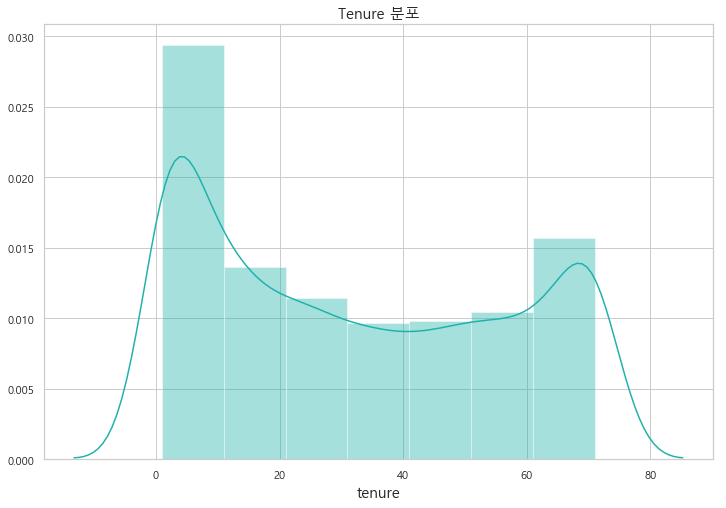

In [110]:
plt.figure(figsize = (12,8))
plt.title('Tenure 분포', fontsize = 15)
plt.xlabel('계약 월수', fontsize = 15)
bins = np.arange(1,73,10)
sns.distplot(data['tenure'], bins = bins, color = 'lightseagreen')
plt.show()

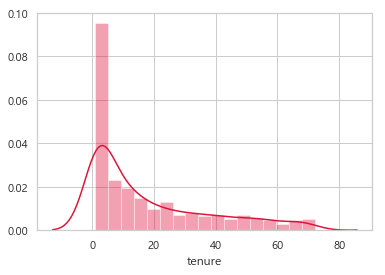

In [109]:
# 이탈자 tenure 분포

sns.distplot(data['tenure'][data['Churn']==1], color = 'crimson')


In [111]:
# data['tenure'] = pd.cut(data['tenure'], bins , labels=['10개월 이하','개월 이하', '12개월 이하', '2년 이하', '3년 이하', '3년 이상'])

In [66]:
data = churn.copy()
data['tenure'] = pd.cut(data['tenure'], bins = [-1,3,6,12,24,36,72], labels = ['1개월미만',' 1-3개월',' 3-6개월', '6개월-1년이하','1-3년','3년 이상'] )

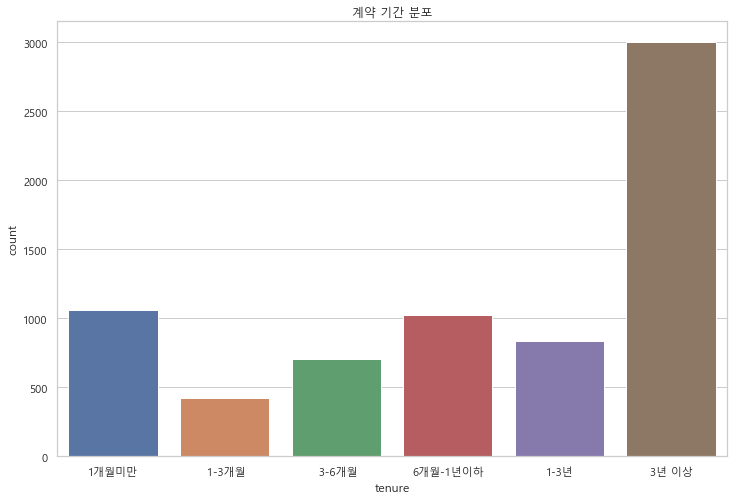

In [69]:
plt.figure(figsize = (12,8))
plt.title('계약 기간 분포')
sns.countplot(data['tenure'])
plt.show()

In [22]:
churns = data[data['Churn'] == 1]
customers = data[data['Churn'] == 0]

In [28]:

customers = data[data['Churn']==0]
churns = data[data['Churn']==1]


In [31]:
churns.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.070749,-0.197494,0.091444,-0.003007,-0.103783,-0.025861,-0.029776,-0.151817,-0.005133,0.029207,0.117398,0.148682,NaN
Partner,0.070749,1.000000,0.389140,0.329406,-0.000579,0.059326,0.090328,0.131963,0.038912,0.107559,0.111057,0.015127,0.162413,NaN
Dependents,-0.197494,0.389140,1.000000,0.095375,0.032618,0.088179,0.053761,0.065621,0.088342,0.029069,0.013001,-0.085189,-0.029362,NaN
tenure,0.091444,0.329406,0.095375,1.000000,0.034730,0.143646,0.300981,0.267857,0.144315,0.290378,0.296404,0.069537,0.401286,NaN
PhoneService,-0.003007,-0.000579,0.032618,0.034730,1.000000,0.036534,0.026898,0.042271,0.046579,0.075614,0.047194,0.040089,0.473434,NaN
OnlineSecurity,-0.103783,0.059326,0.088179,0.143646,0.036534,1.000000,0.254673,0.223349,0.370380,0.159673,0.147045,-0.184082,-0.210306,NaN
OnlineBackup,-0.025861,0.090328,0.053761,0.300981,0.026898,0.254673,1.000000,0.265021,0.256527,0.202260,0.194664,-0.040123,-0.004016,NaN
DeviceProtection,-0.029776,0.131963,0.065621,0.267857,0.042271,0.223349,0.265021,1.000000,0.297372,0.321837,0.323155,-0.051378,0.063428,NaN
TechSupport,-0.151817,0.038912,0.088342,0.144315,0.046579,0.370380,0.256527,0.297372,1.000000,0.235781,0.210444,-0.149979,-0.159062,NaN
StreamingTV,-0.005133,0.107559,0.029069,0.290378,0.075614,0.159673,0.202260,0.321837,0.235781,1.000000,0.475644,0.048423,0.302008,NaN


### Churn과 Customer 의 유의미한 차이가 있을까

In [12]:
len(churns), len(customers)

(1869, 5174)

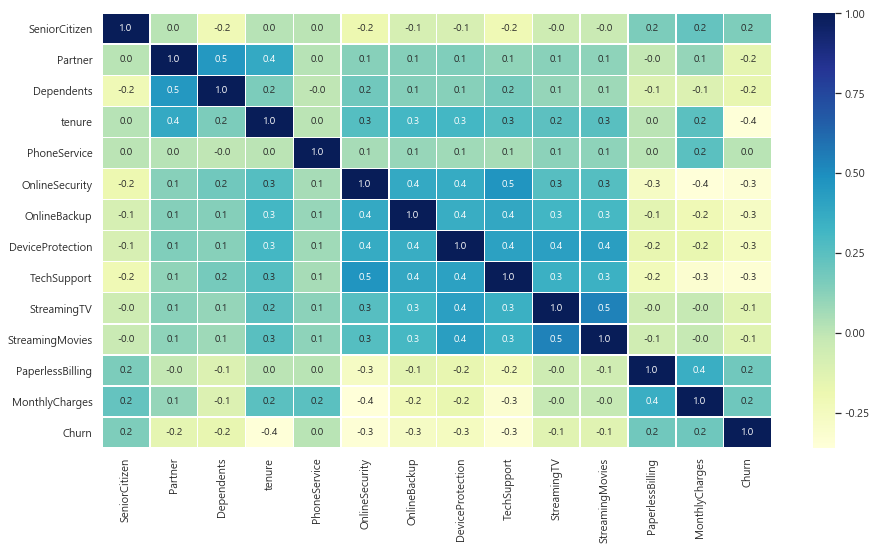

In [40]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap = 'YlGnBu',fmt= '.1f')
plt.show()

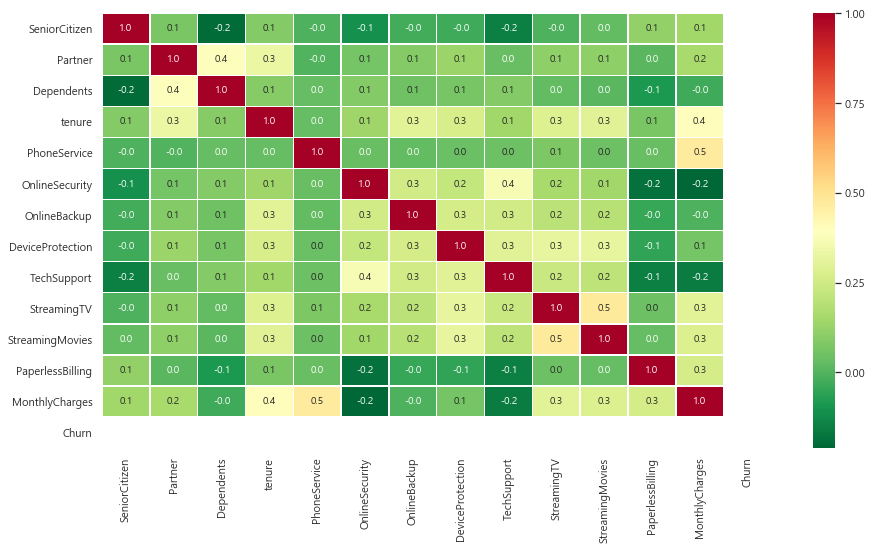

In [41]:
plt.figure(figsize = (15,8))
sns.heatmap(churns.corr(), annot=True, cmap  = 'RdYlGn_r',linewidths=.5, fmt= '.1f')
plt.show()